# NYC 311 Mini‑Project — Missing Data • Regex • Visualization • Pandas/Numpy
**Class day:** 2025-10-17

You will explore a recent slice of NYC 311 service requests (last 1,000 rows). Your goals:

- Practice the *data science process*: posing questions → wrangling/cleaning → analysis → communicating.
- Use tools such as **missing‑data handling**, **regex**, **Pandas/Numpy**, and **visualization**.
- Produce **one figure** answering the guided question and **one figure** answering your own question.


## 1) Setup & Load Data


In [11]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

pd.set_option("display.max_colwidth", 120)
pd.set_option("display.width", 120)

df = pd.read_csv('erm2-nwe9.csv')
df.head()

,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,...,vehicle_type,taxi_company_borough,taxi_pick_up_location,bridge_highway_name,bridge_highway_direction,road_ramp,bridge_highway_segment,latitude,longitude,location
0,66464514,2025-10-14T01:51:17.000,NaN,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,10466.0,655 EAST 230 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.891872,-73.860168,"\n, \n(40.89187241649303, -73.86016845296459)"
1,66465967,2025-10-14T01:51:14.000,NaN,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,11212.0,181 ROCKAWAY PARKWAY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.662317,-73.921442,"\n, \n(40.66231674694474, -73.92144177201318)"
2,66470344,2025-10-14T01:50:47.000,NaN,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,11436.0,137-32 132 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.669856,-73.800419,"\n, \n(40.6698558316466, -73.80041885315545)"
3,66464521,2025-10-14T01:50:42.000,NaN,NYPD,New York City Police Department,Noise - Residential,Loud Television,Residential Building/House,10458.0,2980 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.871881,-73.886143,"\n, \n(40.87188118407785, -73.88614285307307)"
4,66470365,2025-10-14T01:50:33.000,NaN,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,10466.0,655 EAST 230 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.891872,-73.860168,"\n, \n(40.89187241649303, -73.86016845296459)"


## 2) Explore the Data

You can learn more about the dataset [here](https://data.cityofnewyork.us/Social-Services/311-Service-Requests-from-2010-to-Present/erm2-nwe9/about_data)

Explore the data to understand its structure and content. Consider the following questions:
- What are the key columns in the dataset?
- What types of data are present (numerical, categorical, text, etc.)?
- What are the distributions of key variables?
- Are there any missing values or anomalies in the data?

Here is some starter code to help look at missingness that you can copy and paste in a code cell::

```python
missing = df.isna().mean().sort_values(ascending=False)
print("Share missing (top 20):")
display(missing.head(20).to_frame("share_missing"))
```

> `df['column_name'].value_counts()` can be useful for exploring categorical variables.

In [12]:
missing = df.isna().mean().sort_values(ascending = False)
print("Share missing (top 20):")
display(missing.head(20).to_frame("share_missing"))

Share missing (top 20):


,share_missing
facility_type,1.000
taxi_company_borough,1.000
road_ramp,0.999
due_date,0.997
bridge_highway_direction,0.995
taxi_pick_up_location,0.995
bridge_highway_segment,0.991
bridge_highway_name,0.991
vehicle_type,0.964
closed_date,0.464


## 3) What Keywords in resolution_description are Associated with Longer Resolution Times?

You will need to compute the resolution time for each request. You can do this by calculating the difference between the `closed_date` and `created_date` columns using code like this:
```python
df['created_date'] = pd.to_datetime(df['created_date'], errors='coerce')
df['closed_date'] = pd.to_datetime(df['closed_date'], errors='coerce')
df["resolution_time_hours"] = (df["closed_date"] - df["created_date"]).dt.total_seconds() / 3600.0
```

Think about how you will handle missing values in your analysis since some requests may not have a `closed_date`.

In [13]:
df['created_date'] = pd.to_datetime(df['created_date'], errors = 'coerce')
df['closed_date'] = pd.to_datetime(df['closed_date'], errors = 'coerce')
df["resolution_time_hours"] = (df["closed_date"] - df["created_date"]).dt.total_seconds() / 3600.0
df = df.dropna(subset = ['closed_date'])

In [14]:
from collections import Counter

# 3. Define "long resolution" as top 25% of times
threshold = df['resolution_time_hours'].quantile(0.75)
long_cases = df[df['resolution_time_hours'] >= threshold]

# 4. Count most common words in resolution_description for long cases
words = ' '.join(long_cases['resolution_description'].fillna('').str.lower()).split()
common_words = Counter(words).most_common(20)

# 5. Show results
print(f"Top keywords associated with longer resolution times (>{threshold:.1f} hrs):")
for word, count in common_words:
    print(f"{word}: {count}")

Top keywords associated with longer resolution times (>0.8 hrs):
the: 398
to: 152
police: 132
department: 126
and: 100
responded: 99
complaint: 93
that: 47
of: 44
with: 42
action: 42
no: 41
information: 40
available: 40
observed: 40
evidence: 40
violation: 40
at: 40
time.: 40
took: 35


## 4) Pick another question to explore

Make sure to create a figure to answer your question!

**Ideas to help you come up with your own.**
- Are there certain locations that take longer to resolve issues?
- Are there specific types of complaints that are more common in certain areas?
- Are open cases different in nature from closed cases?

What percent of complaints to the NYPD are Noise Complaints? Are there any areas in NYC that have more Noise complaints than others? 

In [16]:
nypolice = len(df[df['agency'] == 'NYPD'])

# Count noise complaints within police complaints
noise_police = len(df[(df['agency'] == 'NYPD') & (df['complaint_type'].str.contains('Noise', case=False, na=False))])

# Compute percentage
percent_noise = (noise_police / nypolice) * 100

print(f"{percent_noise:.2f}% of complaints to the NYPD are noise-related.")

80.00% of complaints to the NYPD are noise-related.


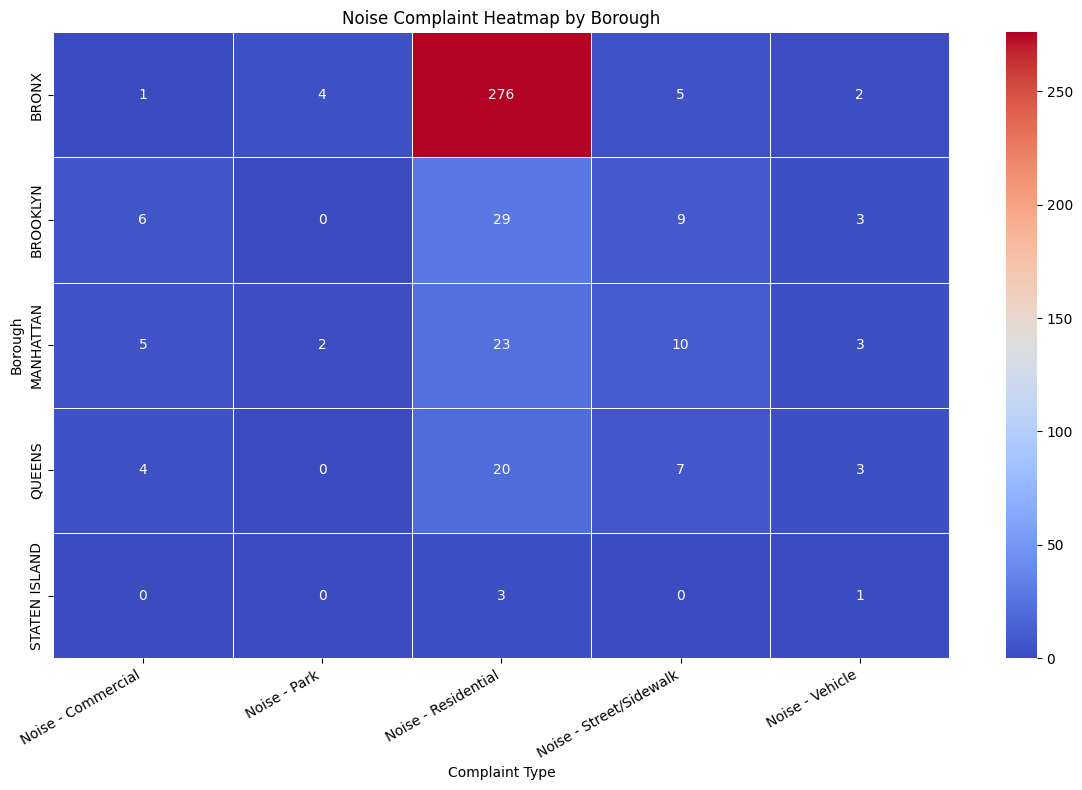

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the noise-related complaint types you want
noise_types = [
    "Noise - Residential",
    "Noise - Commercial",
    "Noise - Vehicle",
    "Noise - Park",
    "Noise - Street/Sidewalk"
]

# Filter your dataframe to only include those complaints
noise_df = df[df['complaint_type'].isin(noise_types)]

# Create a pivot table for just those complaint types
heatmap_data = noise_df.pivot_table(
    index='borough',
    columns='complaint_type',
    values='unique_key',
    aggfunc='count',
    fill_value=0
)

# Plot the filtered heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='coolwarm', linewidths=0.5, annot=True, fmt='d')
plt.title('Noise Complaint Heatmap by Borough')
plt.xlabel('Complaint Type')
plt.ylabel('Borough')
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()